In [1]:
import requests
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import io
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [4]:
# fonction de téléchargement des données sur les accidents corporels
def telecharge(url_data,filename, path):
    # Vérifie si le dossier 'data' existe, sinon le crée
    if not os.path.exists(path):
        os.makedirs(path)
    #télécharge les données avec l'url
    response = requests.get(url_data)
    if response.status_code == 200:
        file_path = os.path.join(path, filename)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Fichier {filename} téléchargé avec succès:{file_path}")
    else:
        print(f"Echec de téléchargement pour {filename}. Statut: {response.status_code}")

# API pour accéder à l'url de téléchargement
url_root="https://www.data.gouv.fr/api/1/datasets/53698f4ca3a729239d2036df/resources/"
urls={
    "usagers-2023.csv":"68848e2a-28dd-4efc-9d5f-d512f7dbe66f",
    "vehicules-2023.csv":"146a42f5-19f0-4b3e-a887-5cd8fbef057b",
    "lieux-2023.csv":"8bef19bf-a5e4-46b3-b5f9-a145da4686bc",
    "caract-2023.csv":"104dbb32-704f-4e99-a71e-43563cb604f2"
}
path='data'

for filename, resource_id in urls.items():
    url=url_root+resource_id
    response1=requests.get(url)
    if response1.status_code==200:
        data=response1.json()
        url_data=data['url']
    else:
        print("downloading failed")
    telecharge(url_data,filename,path)


Fichier usagers-2023.csv téléchargé avec succès:data/usagers-2023.csv
Fichier vehicules-2023.csv téléchargé avec succès:data/vehicules-2023.csv
Fichier lieux-2023.csv téléchargé avec succès:data/lieux-2023.csv
Fichier caract-2023.csv téléchargé avec succès:data/caract-2023.csv


In [5]:
# base des usagers 
df_usagers = pd.read_csv("data/usagers-2023.csv", sep = ';')
df_usagers.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


In [ ]:
/home/onyxia/work/Projet-Python-pour-la-Data-Science

In [6]:
# Base des véhicules 
df_vehicules = pd.read_csv("data/vehicules-2023.csv", sep = ';')
df_vehicules.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,NaN


In [7]:
# Base des lieux 
df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')
df_lieux.head(10)

/tmp/ipykernel_169995/3473159961.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv(r"/home/onyxia/Projet-Python-pour-la-Data-Science/data/lieux-2023.csv", sep = ';')


,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
5,202300000004,2,6,0,NaN,2,4,0,1,18,1,1,NaN,12,2,0,1,50
6,202300000005,4,NaN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
7,202300000005,4,NaN,0,NaN,2,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
8,202300000006,4,NaN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,50
9,202300000007,3,7,0,NaN,2,4,3,1,-1,-1,1,NaN,-1,2,0,1,50


In [8]:
df_caract = pd.read_csv("data/caract-2023.csv", sep = ';')
df_caract.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [9]:
df_merge = df_usagers.merge(df_vehicules, on=["Num_Acc","id_vehicule","num_veh"], how="inner") 
df_merge = df_merge.merge(df_lieux, on="Num_Acc", how="inner")
df_merge = df_merge.merge(df_caract, on="Num_Acc", how="inner")
df_merge.shape

(163683, 55)

### Modélisation

In [8]:
# Packages nécéssaire
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


<Axes: >

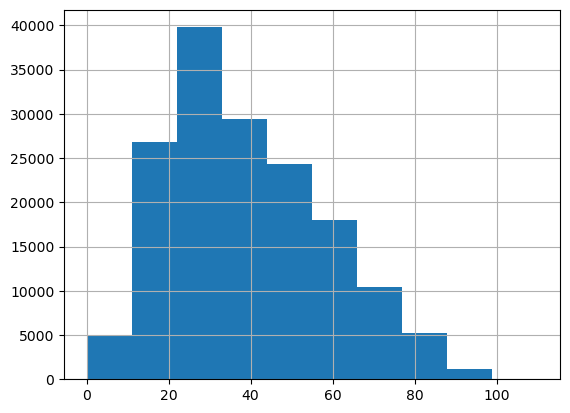

In [9]:
# calcul de l'âge des piétons
df_merge["Age"] = 2023-df_merge["an_nais"]
# Distribution de l'âge
df_merge["Age"].hist()

In [10]:
#supression des variables d'identification
var=["Num_Acc","jour","an","com","adr","lat","long","voie","v1","v2","id_vehicule","num_veh","id_usager","an_nais", "dep"]
Num_acc=df_merge["Num_Acc"]
df_merge.drop(var, axis=1,inplace=True)

# pourcentage des valeurs manquantes par variables 
df_merge.isna().sum()[df_merge.isna().sum()!=0]/len(df_merge)*100

occutc    98.334586
lartpc    99.952347
Age        2.145611
dtype: float64

In [ ]:
df_merge.drop(["occutc","lartpc"], axis=1, inplace=True)

<Axes: xlabel='Age'>

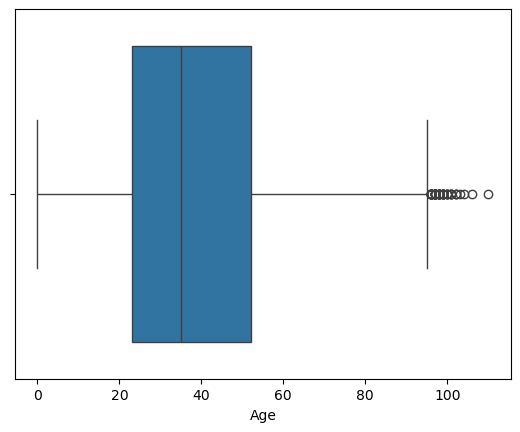

In [12]:
# imputation des valeurs manquantes de l'âge
sns.boxplot(data=df_merge, x=df_merge['Age'])

In [13]:
df_merge["Age"]=df_merge["Age"].fillna(df_merge["Age"].median())

In [ ]:
#recodage des variables trajet et actp de la base usager
df_merge["trajet"]=df_merge["trajet"].replace(0, value=-1)
df_merge["actp"]=df_merge["actp"].replace(0, value=-1)

# variables de type object de la base
df_merge.select_dtypes("object").columns

Index(['actp', 'nbv', 'pr', 'pr1', 'larrout', 'hrmn'], dtype='object')

In [15]:
# conversion des variables de type object en variables numériques
def replace_pr(val):
    if len(val.split())==1:
        val=val
    else:
        if len(val.split())>1:
            val=val.split()[1]
        else:
            val="-1"
    return val
df_merge["pr"]=df_merge["pr"].apply(func=replace_pr)
df_merge["pr"]=df_merge["pr"].astype(float)
df_merge["pr1"]=df_merge["pr1"].apply(func=replace_pr)
df_merge["pr1"]=df_merge["pr1"].astype(float)
def rep_virgule(val):
    val=val.replace(",",".")
    return val
df_merge["larrout"]=df_merge["larrout"].apply(rep_virgule)
df_merge["larrout"]=df_merge["larrout"].astype(float)
def heure(val):
    val=val.split(":")[0]
    return val
df_merge["hrmn"]=df_merge["hrmn"].apply(func=heure)
df_merge["hrmn"]=df_merge["hrmn"].astype(float)

df_merge["nbv"]=df_merge["nbv"].str.strip()
df_merge["nbv"]=df_merge["nbv"].replace("#VALEURMULTI","-1")
df_merge["nbv"]=df_merge["nbv"].astype(float)

df_merge["actp"]=df_merge["actp"].replace(["A","B"],["10","11"])
df_merge["actp"]=df_merge["actp"].astype(float)

In [16]:
#suppression des colonnes qui ont plus de 20% de valeurs non renseignés
diction=[]
for column in df_merge.columns:
    if ((len(df_merge[df_merge[column]==-1][column])/df_merge.shape[0]*100)>=20) == True:
        diction.append(column)
        
df_merge=df_merge.drop(diction, axis=1)

In [17]:
# on remplace toute les valeurs non renseignées des variables restantes par le mode
diction2=[]
for column in df_merge.columns:
    if len(df_merge[df_merge[column]==-1][column])/df_merge.shape[0]!=0:
        diction2.append(column)

for col in diction2:
    mode=df_merge[col].value_counts().idxmax()
    df_merge[col]=df_merge[col].replace(-1,mode)


In [18]:
df_merge.drop(["Age",'hrmn','vma',"nbv","grav"], axis=1).columns

Index(['place', 'catu', 'sexe', 'secu1', 'senc', 'catv', 'obs', 'obsm', 'choc',
       'manv', 'motor', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf',
       'infra', 'situ', 'mois', 'lum', 'agg', 'int', 'atm', 'col'],
      dtype='object')

#### Relation target_variable

In [81]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

for col in df_merge.drop(["Age",'hrmn','vma',"nbv","grav"], axis=1).columns:

    # Création d'une table de contingence
    contingency_table = pd.crosstab(df_merge[col], df_merge["grav"])

    # Calcul du chi-deux et du V de Cramer
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    mindim = min(contingency_table.shape)-1

    # Calcul du V de Cramer
    v = np.sqrt(chi2 / (n * mindim))
    print(col)
    print('Coefficient cramer:', v)
    print('P-value:', p)

place
Coefficient cramer: 0.14210689955299835
P-value: 0.0
catu
Coefficient cramer: 0.1702109034131252
P-value: 0.0
sexe
Coefficient cramer: 0.09700762733214484
P-value: 0.0
secu1
Coefficient cramer: 0.28053008705319266
P-value: 0.0
senc
Coefficient cramer: 0.020324693791572535
P-value: 8.37246074709603e-39
catv
Coefficient cramer: 0.25784299424117746
P-value: 0.0
obs
Coefficient cramer: 0.15017468870028533
P-value: 0.0
obsm
Coefficient cramer: 0.13527105698426814
P-value: 0.0
choc
Coefficient cramer: 0.12177687318094058
P-value: 0.0
manv
Coefficient cramer: 0.1614692691514225
P-value: 0.0
motor
Coefficient cramer: 0.11837550161226613
P-value: 0.0
catr
Coefficient cramer: 0.09816888673906023
P-value: 0.0
circ
Coefficient cramer: 0.07511230786540385
P-value: 0.0
vosp
Coefficient cramer: 0.04149788239954468
P-value: 3.1974596324172815e-176
prof
Coefficient cramer: 0.03818899842417063
P-value: 2.3358989988161868e-148
plan
Coefficient cramer: 0.06630436147723692
P-value: 0.0
surf
Coefficie

In [87]:
from scipy.stats import pearsonr
for col in ["Age",'hrmn','vma',"nbv"]:
    #dfcol=df[[col,"grav"]].dropna()
    corr, p_value = pearsonr(df_merge[col], df_merge["grav"])
    print(col)
    print('Coefficient de corrélation de point bisériel:', corr)
    print('P-value:', p_value)

Age
Coefficient de corrélation de point bisériel: -0.08163511486137105
P-value: 5.269283166204373e-240
hrmn
Coefficient de corrélation de point bisériel: -0.01771183730366321
P-value: 7.704100668302511e-13
vma
Coefficient de corrélation de point bisériel: -0.0020499136181500325
P-value: 0.40691001603327903
nbv
Coefficient de corrélation de point bisériel: -0.008021053581738541
P-value: 0.0011738230628344504


In [19]:
#On caractérise chaque accident par le niveau de gravité le plus haut
df_merge["Num_Acc"]=Num_acc
import numpy as np
id_acc=df_merge["Num_Acc"].unique()
index_true=[]
for i in id_acc:
    df_id=df_merge[df_merge["Num_Acc"]==i]
    n_grav=np.max(df_id["grav"])
    index=df_merge[(df_merge["Num_Acc"]==i) & (df_merge["grav"]==n_grav)].index[0]
    #if len(index)!=0:
    #df_merge.drop(index=index, inplace=True)
    index_true.append(index)
        
df_merge.drop(["Num_Acc"], axis=1, inplace=True)

In [20]:
# Niveau de gravité de l'accident présente dans la nouvelle base
df_merge=df_merge.loc[index_true]
df_merge["grav"].value_counts()

grav
4    38645
3    13904
2     2273
Name: count, dtype: int64

Dans les accidents enregistrés, aucun n'a laisser toutes les personnes impliquées indemnes.

On recode la variable "gravité" par: 
- 2: niveau de gravité **grave** (2)
- 3: niveau de gravité **moyen** (1)
- 4: niveau de gravité **faible** (0)

In [21]:
#recodage de la gravité de l'accident
df_merge["grav"]=df_merge["grav"].replace([3,4], value=[1,0])
# distribution de la gravité
df_merge["grav"].value_counts()/df_merge.shape[0]*100

grav
0    70.491773
1    25.362081
2     4.146146
Name: count, dtype: float64

#### Sélection des variables

Pour la selection des variables qui seront utilisées dans le modèle de régression logistique, nous utiliserons une regression Lasso. C'est une technique de régularisation qui consiste à appliquer une pénalité pour éviter le surapprentissage et améliorer la précision des modèles statistiques.


In [ ]:
#corrélation entre les variables
#plt.figure(figsize=(20,20))
#sns.heatmap(df_merge.corr(),annot=True)

In [ ]:
# on retire les variables qui ont une forte corrélation avec d'autres
#df_merge=df_merge.drop(["place","agg"], axis=1)

Par la suite, nous utilisons un encodage onehot sur les variables catégorielles (catégorielles nominales) qui va creer de nouvelles variables indicatrices et vont faciliter les interprétations des résultats du modèle. Aussi, nous standardisons les variables continues.

In [22]:
# en utilisant une regression lasso
numeric_var=["Age",'hrmn','vma',"nbv"]
lasso_x=df_merge.drop(["grav"],axis=1)
categorical_var=lasso_x.drop(numeric_var, axis=1).columns
lasso_y=df_merge["grav"]

numeric_pipeline = Pipeline(
    steps=[("scale", StandardScaler())]
)

categorical_pipeline = Pipeline(
    steps=[
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)

Nous déterminons ensuite le meilleur hyperparamètre alpha en utilisant une validation croisée afin que les variables qui seront sélectionner par le Lasso prédisent au mieux le niveau de gravité des accidents.

In [ ]:
base=categorical_pipeline.fit_transform(lasso_x.drop(columns=numeric_var,axis=1))
base_cont=numeric_pipeline.fit_transform(lasso_x[numeric_var])
data=pd.DataFrame(data=base, columns=categorical_pipeline.get_feature_names_out())
data[numeric_var]=base_cont

my_alphas = np.array([0.001, 0.01, 0.02, 0.025])
lcv = LassoCV(alphas=my_alphas, fit_intercept=False, random_state=0, cv=3).fit(
    data, lasso_y)
print("alpha optimal :", lcv.alpha_)

Implémentons enfin le Lasso, et conservons la base de données avec les variables non pénalisées.

In [ ]:
# Application du lasso
model = Lasso(fit_intercept=False, alpha=lcv.alpha_)
lasso_optimal=model.fit(data, lasso_y)
data.columns[np.abs(lasso_optimal.coef_)>0] # variables sélectionner

NameError: name 'lcv' is not defined

In [ ]:
data_model=data[data.columns[np.abs(lasso_optimal.coef_)>0]]

#### Implémentation de la régression logistique

Division de la base de données en données d'entrainement et données de test 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data_model,lasso_y, test_size=0.2, random_state=42)

In [ ]:
params={'penalty':["l2",None], 'solver':["newton-cg"]}
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(LogisticRegression(multi_class="multinomial",class_weight="balanced"), params, cv=cv)
grid.fit(x_train, y_train)
print("best params:",grid.best_params_)
print("best score:",grid.best_score_)


In [ ]:
model=grid.best_estimator_
acc_train = accuracy_score(y_train, model.predict(x_train))
acc_test = accuracy_score(y_test, model.predict(x_test))
print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

In [ ]:
#confusion matrix
from sklearn import metrics
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_test)
#plt.title(all_sample_title, size = 15);
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')

In [ ]:
importances1 = model.coef_[0]
odds_ratios1 = pd.Series(np.exp(importances1), index=data_model.columns).sort_values() #coefficient des variables dans le modèle
fig1 = px.bar(x=odds_ratios1.tail(15),y=odds_ratios1.tail(15).index, orientation="h",title="Odds Ratio-reference 1")
fig1.update_layout(xaxis_title="exp(coef)", yaxis_title="Variables")


In [ ]:
importances2 = model.coef_[1]
odds_ratios2 = pd.Series(np.exp(importances2), index=data_model.columns).sort_values() #coefficient des variables dans le modèle
fig2 = px.bar(x=odds_ratios2.tail(15),y=odds_ratios2.tail(15).index, orientation="h",title="Odds Ratio-reference 2")
fig2.update_layout(xaxis_title="exp(coef)", yaxis_title="Variables")

- L'utilisation de la ceinture de sécurité seule augmente la chance que la ravité de l'accident soit moyenne de 82%.
- Lorsque la voiture se trouve entre deux files avant l'accident, la gravité de l'accident à 54% d'être moyenne que d'être faible
- un véhicule scooter<50cm3, l'autoroute, heurté une glissière en béton augmentent la chance d'avoir un accident de gravité moyenne de 54%,51%,47% respectivement.
- une collision de trois véhicules et plus-en chaine augmentent la chance d'avoir un accident de gravité moyenne de 45%.
 - les caractéristiques suivantes: une manoeuvre d'évitement, un accident sur piste cyclable, heurté un véhicule en stationnement, avec un scooter > 50cm3 et <=125cm3, avoir un accident sur la chaussée, ou avec un véhicule léger, ou encore sous une pluie légère,  augmentent la chance d'avoir un accident de gravité moyenne entre 15% et 30%. 

 - Avoir un accident sur un cyclomoteur<50cm3 ou sur une motocyclette augmente la probabilité que l'accident soit grave de plus de 40%.

In [ ]:
fig3 = px.bar(x=odds_ratios1.head(10),y=odds_ratios1.head(10).index, orientation="h",title="Odds Ratio-reference 1")
fig3.update_layout(xaxis_title="exp(coef)", yaxis_title="Variables")


In [ ]:
fig4 = px.bar(x=odds_ratios2.head(10),y=odds_ratios2.head(10).index, orientation="h",title="Odds Ratio-reference 2")
fig4.update_layout(xaxis_title="exp(coef)", yaxis_title="Variables")

### Implémentation d'un modèle de random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.arange(100, 500, 100)]
max_features = ['auto', 'sqrt']
max_depth = [10,15]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
criterion = ['gini', 'entropy']
params_grid = {'n_estimators': n_estimators, 
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion
              }

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(RandomForestClassifier(class_weight="balanced"), params_grid, cv=cv)
grid.fit(x_train, y_train)
print("best params:",grid.best_params_)
print("best score:",grid.best_score_)

NameError: name 'x_train' is not defined